In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

from sklearn.svm import SVC, SVR
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.datasets import load_boston, load_breast_cancer,load_iris
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.svm import SVC

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bayes_opt import BayesianOptimization

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False


In [ ]:
# KNN 과 동일 옵션만 바뀐 상태로 범위를 지정해주고 최적값을 탐색
SVM_search_point = {'C': int(1,30),
            'kernel': (['linear','poly','rbf','sigmoid','precomputed']),
            'gamma': (0.00001, 10),
            'tol': (0.0001, 1),
            'max_iter':(100, 1000)
            }



scores_all = list()
c_all = list()
gamma_all = list()
tol_all  = list()
max_all = list()

def SVM_opt(C,kernel, gamma, tol, max_iter):
    cvscores = []
    
    for train_index, val_index in skfolds.split(x_data, y_data):
        print(train_index)
        x_skftrain, x_val = x_train.values[train_index],x_train.values[val_index]
        Y_skftrain, Y_val = np.array(y_train)[train_index],np.array(y_train)[val_index]

        SVMmodel = SVC( C= int(C) , kernel=kernel , probability = True, 
                       gamma= gamma, tol=tol, max_iter=int(max_iter)) # SVM  
        
        SVMmodel_fit = SVMmodel.fit(x_skftrain,Y_skftrain)      # 모델학습
        y_pred = SVMmodel_fit.predict(x_val)                    # 예측

        report = f1_score(Y_val, y_pred, average='weighted') # F1
        cvscores.append(report)
    
    scores_all.append(np.mean(cvscores))
    c_all.append(int(C))
    gamma_all.append(gamma)
    tol_all.append(tol)
    max_all.append(int(max_iter))
    return np.mean(cvscores)

result = BayesianOptimization(SVM_opt, SVM_search_point, random_state=3, verbose=2) 
result.maximize(acq='ucb',n_iter=20, kappa=2.576, init_points=1 )

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('aug_train_5.csv')
df =df.astype({'target': 'int'})

<pre>
training_hours 가 이직 성공에 얼마나 영향을 줄 것인가
이직에 성공했을 경우 가장 큰 영향을 주는 특성데이터는 어떤 것일까
신입이 회사로 취직할 때의 영향력 있는 특성데이터가 어떤 것이며 중요도가 어떠할까
    -> 세부적으로  학력, 전공 중 어떤 것이 중요한가 -> 학력의 비율을 체크하기
    -> 전 회사의 규모가 줄 수 있는 영향은?  -- 클 수록 오히려 이직을 안하려할 것인데 이직성공률은 높지않을까
    -> 이직에 경력이 주는 영향력이 어느정도일까
    -> 남성과 여성의 비율 차이는?
 </pre>

# 분석하기

In [4]:
target_df = df[df['target'] == 1]
non_target_df = df[df['target'] == 0]

In [5]:
# target_df
non_target_df['training_hours']

1         47
2          8
3         24
6        108
7         23
        ... 
14369     23
14370     60
14371     25
14374     44
14375     97
Name: training_hours, Length: 11066, dtype: int64

In [6]:
non_target_df['training_hours'].mean()

65.96511838062534

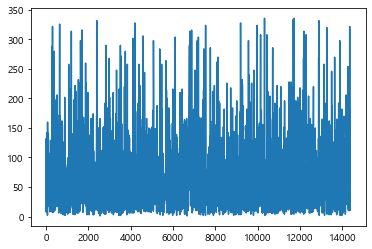

In [7]:
target_df['training_hours'].plot()
plt.show()

In [8]:
target_df['education_level'].value_counts()

학사    2338
석사     640
고졸     269
박사      43
초졸      20
Name: education_level, dtype: int64

In [9]:
non_target_df['education_level'].value_counts()

학사    6781
석사    2632
고졸    1184
박사     283
초졸     186
Name: education_level, dtype: int64

In [10]:
df['education_level'].value_counts()

학사    9119
석사    3272
고졸    1453
박사     326
초졸     206
Name: education_level, dtype: int64

In [11]:
target_df['education_level'] =='학사'

0         True
4         True
5         True
10        True
15       False
         ...  
14357     True
14367     True
14368    False
14372     True
14373     True
Name: education_level, Length: 3310, dtype: bool

### 성별의 비율, 이직을 하게되는 사람들중 남성의 비율은?

In [12]:
df['gender'].value_counts()

남성    13144
여성     1232
Name: gender, dtype: int64

In [13]:
df['gender'][df['gender']== '남성'].count()

13144

In [14]:
man  = df['gender'][df['gender']== '남성'].count() / df['gender'].count()

In [15]:
woman = df['gender'][df['gender']== '여성'].count()/ df['gender'].count()

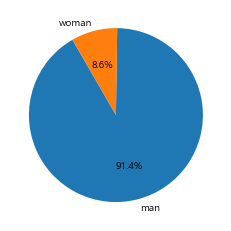

In [16]:
plt.pie([man,woman],labels= ['man','woman'],autopct='%.1f%%'
       ,startangle=120)
plt.show()

          업종 전체 성별 비율

In [17]:
target_man = target_df['gender'].value_counts()[0]/target_df['gender'].count()

In [18]:
target_woman = target_df['gender'].value_counts()[1]/target_df['gender'].count()

In [19]:
non_target_man = non_target_df['gender'].value_counts()[0]/non_target_df['gender'].count()
non_target_woman = non_target_df['gender'].value_counts()[1]/non_target_df['gender'].count()

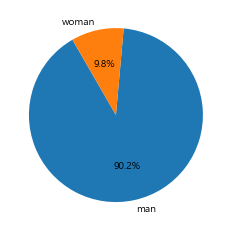

In [20]:
plt.pie([target_man,target_woman],labels= ['man','woman'],autopct='%.1f%%'
       ,startangle=120)
plt.show()

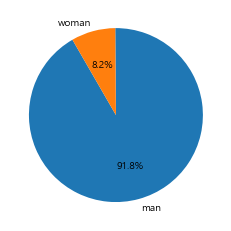

In [21]:
plt.pie([non_target_man,non_target_woman],labels= ['man','woman'],autopct='%.1f%%'
       ,startangle=120)
plt.show()

이직에 대한 여부에 성별은 큰 영향을 주지 않는듯함<br>
업종의 성별비율과 이직시의 성별비율이 비슷한 비율을 가짐

### 학력과 전공은 트레이닝 시간에 영향을 주는가

In [22]:
df3c = df[['education_level','major_discipline','training_hours']]

In [23]:
df3c = df3c.sort_values(by=['training_hours'])

## trainig 기준으로 정렬했을때는 구분하기 힘듬

In [24]:
df3c.nlargest(10, 'training_hours', keep='all')

,education_level,major_discipline,training_hours
10323,석사,공학,336
11720,학사,공학,336
3354,초졸,기타 전공,336
12593,학사,공학,336
4801,학사,공학,336
3658,학사,공학,336
10450,석사,인문학,336
7739,석사,공학,334
2473,석사,공학,334
4591,석사,공학,334


In [25]:
df3c.nsmallest(5, 'training_hours', keep='all')

,education_level,major_discipline,training_hours
13383,학사,공학,1
6668,학사,기타 전공,1
4835,학사,공학,1
7654,석사,경영학,1
10544,초졸,기타 전공,1
4463,석사,공학,1
2561,석사,공학,1


## 각 학력별 트레이닝  평균을 찾아보기로

In [26]:
df3c['education_level'].unique()

array(['학사', '석사', '초졸', '고졸', '박사'], dtype=object)

In [27]:
df3c.groupby('education_level').mean()

,training_hours
education_level,
고졸,67.478321
박사,67.184049
석사,62.989609
초졸,64.038835
학사,65.774537


학력은 트레이닝시간에 영향을 주지않는다.<br>
그렇다면 트레이닝 시간은 이직에 영향을 줄 수 있는가

In [28]:
df2c = df[['training_hours','target']]

In [29]:
df2c.groupby('target').agg((min,max))

training_hours     
                  min  max
target                    
0                   1  336
1                   1  336

In [30]:
df2c.groupby('target').mean()

,training_hours
target,
0,65.965118
1,63.163142


확인해봤는데 별로 영향없는거같음.. 비슷한 수치를 가짐

## 학력 전공으로 이직 확인

In [31]:
df4c = df[['education_level','major_discipline','training_hours','target']]

In [32]:
df4c.set_index(['education_level','major_discipline']).sort_values(by='education_level')

training_hours  target
education_level major_discipline                        
고졸              기타 전공                         97       0
                기타 전공                        310       0
                기타 전공                        141       0
                기타 전공                         62       0
                기타 전공                        163       0
...                                          ...     ...
학사              공학                            27       0
                공학                            51       1
                공학                            79       0
                공학                            36       0
                공학                            23       1

[14376 rows x 2 columns]

In [33]:
df4c.groupby(by=['education_level','major_discipline','target']).mean()

training_hours
education_level major_discipline target                
고졸              기타 전공            0            67.722973
                                 1            66.401487
박사              경영학              0            69.000000
                공학               0            67.675573
                                 1            63.275000
                기타 전공            0            51.666667
                예술               0            48.000000
                                 1            62.000000
                인문학              0            68.750000
                                 1           128.500000
석사              경영학              0            67.632653
                                 1            60.538462
                공학               0            63.948564
                                 1            59.452632
                기타 전공            0            57.508197
                                 1            87.000000
                예술               0            58.900000
                                 1            51.750000
                인문학              0            64.380000
                                 1            56.517241
                전공 없음            0            57.000000
                                 1            34.666667
초졸              기타 전공            0            65.096774
                                 1            54.200000
학사              경영학              0            65.940741
                                 1            79.660000
                공학               0            66.363873
                                 1            63.559040
                기타 전공            0            68.150838
                                 1            69.393617
                예술               0            58.789474
                                 1            75.275862
                인문학              0            68.533333
                                 1            55.231707
                전공 없음            0            71.045045
                                 1            51.476190

## 21년 이상은 모두 21로 표현함

In [34]:
df_exper = df['experience'].value_counts().sort_index()

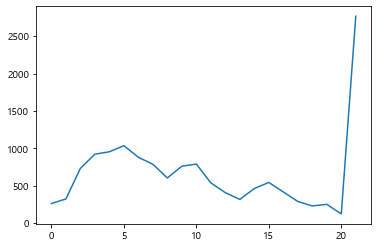

In [35]:
plt.plot(df_exper)
plt.show()

예상외로 20년 이상으로 경력을 가진사람들이 꽤 많음<br>
최근에 데이터 사이언티스가 관심도가 높아지면서 다른 분야의 사람들이 자신의 경력을 포기해가며<br>

In [36]:
df_com = df['company_size'].value_counts().sort_values()

데이터상에서 0은 경력이 없던 사람이 취직을 했을때이고 그 숫자가 많다는건 최근 데이터사이언스에 대한 취업이 늘었다고 볼 수 있지않을까?<br>
-- 확실히 중소기업에서 이직이 많이 증가하고있는데 대기업에서 데이터사이언스에 대한 수요가 늘어난거 아닐까

## 경력이 그럼 이직에 얼마나 영향을 줄까

In [37]:
df_ex= df[['experience','target']]

In [38]:
df_ex[df_ex['target']==1].mean()

experience    8.727492
target        1.000000
dtype: float64

In [39]:
target_df['company_size'].value_counts()

Empty        1633
50-99         362
100-500       312
10000+        270
10/49         235
<10           147
1000-4999     147
500-999       104
5000-9999      71
0              29
Name: company_size, dtype: int64

In [40]:
df_ex[df_ex['target']==0].mean()

experience    11.334538
target         0.000000
dtype: float64

In [41]:
non_target_df['company_size'].value_counts()

Empty        2483
50-99        1962
100-500      1739
10000+       1286
10/49         887
1000-4999     886
<10           841
500-999       565
5000-9999     371
0              46
Name: company_size, dtype: int64

오히려 이직을 실패한 경우가 더 평균이 높은데..? 더 자세히 알아볼 필요있을듯<br>
오히려 경력이 쌓일수록 이직을 꺼리는 경향이 있는거아닐까

In [42]:
(target_df['experience'].value_counts()/df['experience'].value_counts()).sort_values()

18    0.113537
16    0.132212
19    0.136000
21    0.151844
15    0.167587
17    0.170139
14    0.175325
12    0.182266
10    0.196451
13    0.202532
11    0.210428
20    0.213115
9     0.214474
8     0.243781
6     0.260523
5     0.280193
7     0.290076
4     0.303253
2     0.311475
3     0.327904
1     0.397516
0     0.452107
Name: experience, dtype: float64

이직된 사람들의 경력별 수 /  전체사람의 경력별 수 => 경력별 이직 성공 사람들의 비율<br>
그럼 반대는 경력별 이직 실패사람들의 비율

In [43]:
df[df['experience']==1]['target'].value_counts()

0    194
1    128
Name: target, dtype: int64

In [44]:
df.groupby(by='experience').mean()

,city_development_index,last_new_job,training_hours,target
experience,,,,
0,0.750444,0.980843,58.766284,0.452107
1,0.793314,0.621118,65.360248,0.397516
2,0.791531,0.867486,62.131148,0.311475
3,0.794724,1.119435,66.396308,0.327904
4,0.802726,1.210913,64.961175,0.303253
5,0.810225,1.419324,65.792271,0.280193
6,0.814340,1.594994,66.716724,0.260523
7,0.815356,1.751908,64.896947,0.290076
8,0.824420,1.829187,67.119403,0.243781


경력이 높아질

In [45]:
df.groupby(by='company_size').mean()

,city_development_index,experience,last_new_job,training_hours,target
company_size,,,,,
0,0.741813,0.000000,0.000000,67.480000,0.386667
10/49,0.827856,10.018717,2.041889,67.475045,0.209447
100-500,0.843803,11.508045,2.319844,62.399805,0.152121
1000-4999,0.865798,12.631171,2.563408,64.863504,0.142304
10000+,0.853310,11.884319,2.496787,64.971080,0.173522
50-99,0.841127,10.724613,2.149742,68.194923,0.155766
500-999,0.846714,11.829596,2.361734,61.887892,0.155456
5000-9999,0.860609,12.223982,2.570136,64.341629,0.160633
<10,0.836733,10.570850,2.022267,65.069838,0.148785


In [46]:
df.groupby(by='target').mean()

,city_development_index,experience,last_new_job,training_hours
target,,,,
0,0.860415,11.334538,2.159226,65.965118
1,0.771402,8.727492,1.832628,63.163142


60시간정도의 훈련과정 시간을 가지게되면 이 직장에서 일할 능력이 갖춰졌다고 판단할 수 있지않을까<br>
그렇다면 비슷한 훈련시간을 갖췄는데도 오히려 더길게 했는데도 이직을 못한걸까

In [47]:
target_df[['company_size','relevent_experience','experience']]

,company_size,relevent_experience,experience
0,Empty,관련 경험 있음,21
4,<10,관련 경험 있음,13
5,50-99,관련 경험 있음,7
10,Empty,관련 경험 있음,4
15,<10,관련 경험 있음,11
...,...,...,...
14357,10000+,관련 경험 있음,8
14367,100-500,관련 경험 없음,1
14368,50-99,관련 경험 있음,9
14372,Empty,관련 경험 없음,14


In [48]:
len_rele =len(target_df[target_df['relevent_experience']=='관련 경험 있음'])
len_rele_non =len(non_target_df[non_target_df['relevent_experience']=='관련 경험 있음'])

In [49]:
count_rele = target_df['relevent_experience'].count()
count_rele_non = non_target_df['relevent_experience'].count()

In [50]:
len_rele/count_rele

0.6474320241691843

In [51]:
len_rele_non/count_rele_non

0.7804084583408639

In [52]:
df['target'].value_counts()

0    11066
1     3310
Name: target, dtype: int64

## 시각화

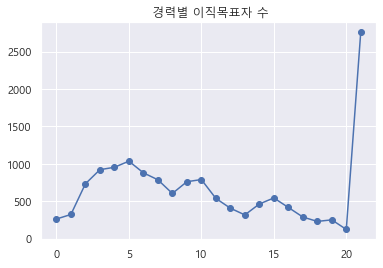

<Figure size 432x288 with 0 Axes>

In [84]:
df_exper = df['experience'].value_counts().sort_index()
plt.plot(df_exper, 'o-')
plt.title(' 경력별 이직목표자 수')
plt.show()
plt.savefig('경력별 이직목표자 수.jpg')

21 이라는 수치는 21년이상의 경력자들을 모두 합쳐놓은수치임<br>
자신의 직종에서 20년 이상의 경력을 쌓은 사람도 생각보다 많이 이직을 목표로 훈련을 받고 있음을 알수 있음<br>
데이터 사이언스에 대한 관심도가 생기고 필수적인 요소로 작용해서 그런거아닐까

In [54]:
## 기업들의 수를 파악하기 위한 지표를 칼럼에 추가
df['ForCount']= 1

In [55]:
df_comty = df.groupby(by='company_type').sum()[['ForCount']].sort_values(by='ForCount')
df_comty

,ForCount
company_type,
신입,75
기타,89
비정부기구,399
신생 스타트업,427
공공기관,704
투자받은 스타트업,831
other,4229
유한책임회사,7622


In [56]:
df_comty_val= df_comty['ForCount'].values.reshape(8)

In [57]:
df_ex0 = df[df['experience']==0]

In [58]:
df_ex0[['relevent_experience','target','ForCount']].groupby(by=['relevent_experience','target']).sum()

ForCount
relevent_experience target          
관련 경험 없음            0             98
                    1             76
관련 경험 있음            0             45
                    1             42

In [59]:
sns.set(font="Malgun Gothic",style='darkgrid')

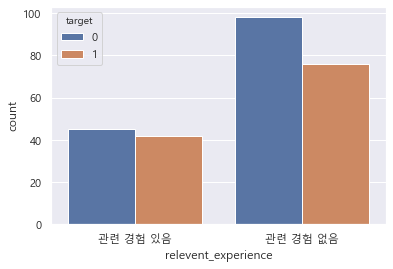

<Figure size 432x288 with 0 Axes>

In [85]:
sns.countplot(x="relevent_experience", hue="target", data=df_ex0)
plt.show()
plt.savefig('신입의 취업여부와 관련경험.jpg')

신입들을 기준으로 확인해본 결과 관련 경험이 없었던 사람도 훈련을 받은 뒤 취업하는 것에 큰 영향이 없었음

In [61]:
tar_df_ex0   = df_ex0[df_ex0['target']==1]
notar_df_ex0 = df_ex0[df_ex0['target']==0]
## 신입중 이직에 성공한 사람

In [62]:
df_ex0[['education_level','major_discipline','target','ForCount']].groupby(by=['education_level','target']).sum()

ForCount
education_level target          
고졸              0             40
                1             14
박사              0              1
                1              1
석사              0             17
                1             14
초졸              0             12
                1              3
학사              0             73
                1             86

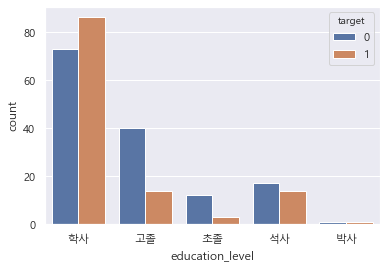

<Figure size 432x288 with 0 Axes>

In [86]:
sns.countplot(x="education_level", hue="target", data=df_ex0)
plt.show()
plt.savefig('신입의 취업과 학력관계.jpg')

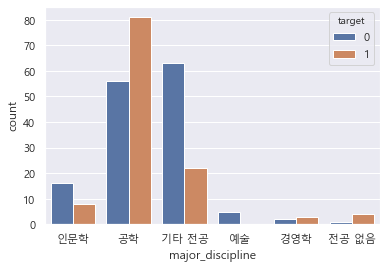

<Figure size 432x288 with 0 Axes>

In [87]:
sns.countplot(x="major_discipline", hue="target", data=df_ex0)
plt.show()
plt.savefig('신입의 전공과 학력관계.jpg')

In [65]:
df_ex0[['training_hours','target']].groupby(by='target').mean()

,training_hours
target,
0,59.804196
1,57.508475


In [66]:
df_company =df[['company_size','company_type','target','ForCount']].groupby(by=['company_type','company_size']).sum().sort_values(by=['company_type','ForCount'])

In [67]:
df_company_type = df[['company_size','company_type','target','ForCount']].groupby(by=['company_type']).sum().sort_values(by=['company_type','ForCount'])

In [68]:
df_company_type

,target,ForCount
company_type,,
other,1601,4229
공공기관,142,704
기타,18,89
비정부기구,65,399
신생 스타트업,94,427
신입,29,75
유한책임회사,1249,7622
투자받은 스타트업,112,831


In [69]:
data_com = (df_company_type['target']/df_company_type['ForCount']).sort_values()

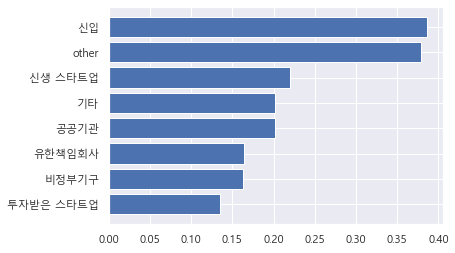

<Figure size 432x288 with 0 Axes>

In [88]:
plt.barh(data_com.index , data_com.values)
plt.show()
plt.savefig('회사별 입사, 이직 성공률.jpg')

<pre>
신입들의 입사 성공율이 가장 높았고, other의 경우 회사를 밝히기 꺼려하는 사람들이므로 제외한다면 
신생 스타트업에서의 이직하는 경우가 가장 높은 이직 성공률을 보였지만 다른 경우와 크게 차이는 없다
아무래도 스타트업에서 경력을 쌓은 뒤 이직을 하는 케이스가 많기 때문이라고 생각하는데
그만큼 성공률도 높으니 후에 취직을 준비할 때 스타트업에서 경력을 쌓으며 시작하는 방법 또한 하나의 선택지라고 생각든다.
</pre>

## 경력직의 경우

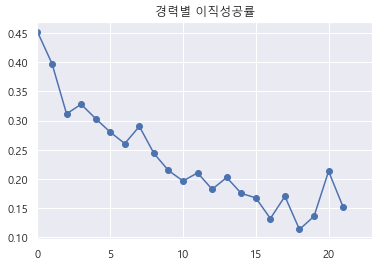

<Figure size 432x288 with 0 Axes>

In [89]:
plt.plot(df.groupby(by='experience').mean()['target'], 'bo-')
plt.title('경력별 이직성공률')
plt.xlim(0,23)
plt.show()
plt.savefig('경력별 이직성공률.jpg')

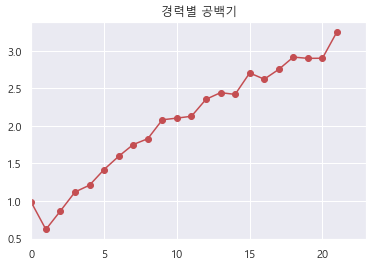

<Figure size 432x288 with 0 Axes>

In [90]:
plt.plot(df.groupby(by='experience').mean()['last_new_job'], 'ro-')
plt.title('경력별 공백기')
plt.xlim(0,23)
plt.show()
plt.savefig('경력별 공백기.jpg')

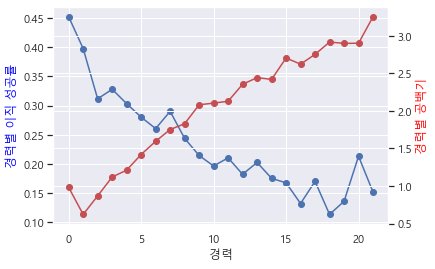

<Figure size 432x288 with 0 Axes>

In [91]:
fig, ax1 = plt.subplots( )
ax1.set_xlabel('경력')
ax1.set_ylabel('경력별 이직 성공률', color =  'blue')
ax1.plot(df.groupby(by='experience').mean()['target'],'bo-')

ax2 = ax1.twinx()
ax2.plot(df.groupby(by='experience').mean()['last_new_job'], 'ro-')
ax2.set_ylabel('경력별 공백기',color =  'red')

plt.show()
plt.savefig('경력별 공백기 + 이직성공률.jpg')


<pre>
이직 성공 확률은 경력이 낮을 수록 높은데
경력이 많을 수록 이전 직장과의 공백기가 늘어남
경력이 많을 수록 다른 직종에 대한 이직이 힘든것을 알 수있음
    -> 만족하는 조건이 아니라서..?
    -> 다른 직종으로의 이동에 대한 리스크가 큼
    
</pre>